<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/CCVRP_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

In [1]:
import pandas as pd
!pip install ortools
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt # Data visualization
import random
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.0 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protob

{1: (0.5, 0.5, 0),
 2: (0.6032938169082293, 0.7562108184145938, 20),
 3: (0.07472475201926587, 0.7390918600532372, 18),
 4: (0.22499063130328856, 0.20230576957968283, 13),
 5: (0.3771457600244701, 0.993883586940067, 16),
 6: (0.996944577187803, 0.6516022694530335, 7),
 7: (0.013989304846158013, 0.24618666302814662, 3),
 8: (0.4548557134824929, 0.7878016821009027, 13),
 9: (0.5568871799369395, 0.6669799494093894, 14),
 10: (0.37068093166049076, 0.7990225388206484, 1),
 11: (0.13140393664262962, 0.1487946611744766, 3),
 12: (0.17885860292736544, 0.2831786658489319, 10),
 13: (0.645737926048391, 0.3408452578158331, 19),
 14: (0.7919716098508769, 0.5663126369728344, 12),
 15: (0.25524445622471126, 0.1583777731314686, 14),
 16: (0.3114838478536932, 0.6499966765965005, 13),
 17: (0.7206591160396403, 0.7068882032670168, 9),
 18: (0.9735099670408185, 0.99498727064737, 7),
 19: (0.3446038119418944, 0.046683484069192205, 6),
 20: (0.2866425752959685, 0.1386034957501685, 3),
 21: (0.7359808817862

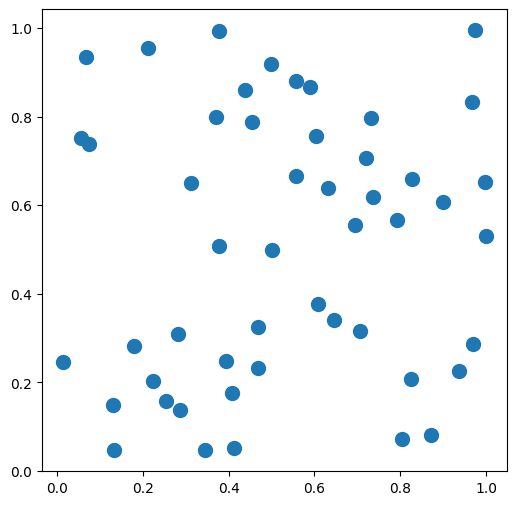

In [28]:
n = 50
depot = 1
nodes = [i for i in range(1,1+n)]
data = {}
for n in nodes:
  data[n]=(random.random(),random.random(), random.randint(1,20))
data[depot]=(0.5, 0.5,0)
cars = range(4)
plt.figure(figsize=(6,6))
X= [data[n][0] for n in nodes]
Y= [data[n][1] for n in nodes]
plt.scatter(X,Y,s=100)
data

In [29]:
def distance(n:int,m:int,data:dict)-> int:
  x1,y1 = data[n][0],data[n][1]
  x2,y2 = data[m][0],data[m][1]
  return int(100*np.sqrt( (x1-x2)**2+(y1-y2)**2))

distance(1,2,data)
print(nodes)

check = sum(data[n][2] for n in nodes)
print(check)

KOLORS = ['r','k','b','g']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
539


In [48]:
for i in nodes:
  for j in nodes:
    if i>j and distance(i,j,data) <= 15:
      print(i,j, distance(i,j,data))


a= [distance(i,j,data) for i in nodes for j in nodes if i>j]
print(min(a),max(a), np.mean(a))



8 2 15
9 2 10
9 8 15
10 8 8
11 4 10
11 7 15
12 4 9
12 11 14
15 4 5
15 11 12
15 12 14
17 2 12
17 14 15
19 15 14
20 4 8
20 11 15
20 15 3
20 19 10
21 14 7
21 17 9
22 3 2
25 1 12
25 16 15
26 24 14
27 4 12
27 12 10
27 15 15
28 2 11
28 8 15
32 13 5
33 23 9
33 32 14
34 15 15
34 19 14
34 20 12
34 23 8
35 2 12
35 9 7
35 17 11
35 21 10
36 20 15
36 23 7
36 27 12
36 33 10
36 34 7
37 2 13
37 8 13
37 28 3
38 5 14
38 8 7
38 10 9
38 28 15
38 37 11
39 14 9
39 17 11
39 21 10
40 11 10
41 14 9
41 17 15
41 21 7
41 35 10
42 30 13
42 31 11
43 2 13
43 17 9
43 28 15
44 30 6
44 31 15
44 42 13
45 31 6
46 6 10
46 14 11
46 39 8
47 13 6
47 32 11
48 19 6
48 20 15
48 34 12
49 5 14
49 8 13
49 28 10
49 37 6
49 38 8
50 6 12
50 46 12
2 126 52.098775510204085


#TSP

Min of objective function: 582.0



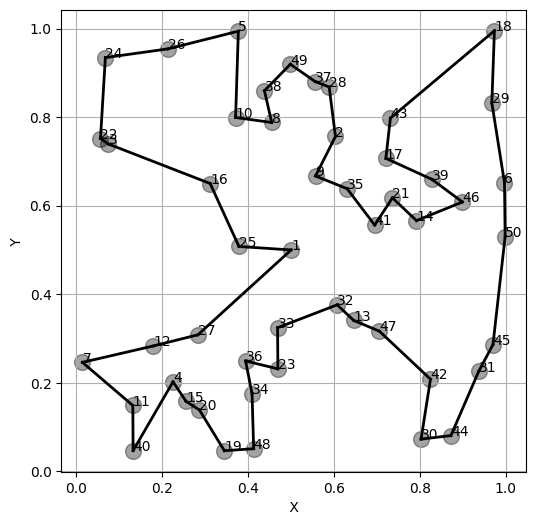

In [52]:
def main() -> None:
    # Creates the model.
    cars = [1]
    Dmin = 12
    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}


    for c in cars:
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c]
      model.AddCircuit(arcs)

    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 90
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

#CVRP

Min of objective function: 1054.0



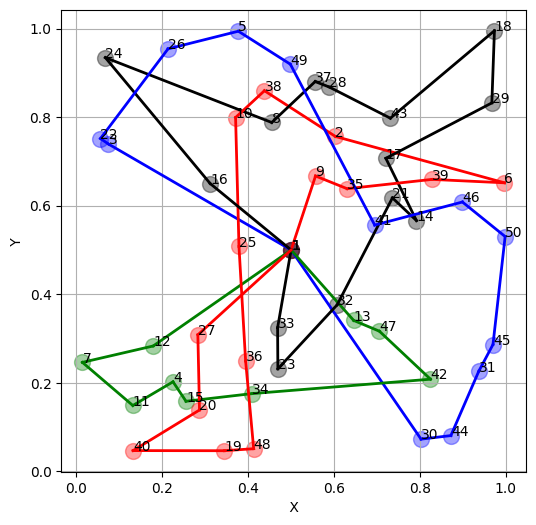

In [50]:
def main() -> None:
    # Creates the model.
    cars = range(4)
    cap = {0:150, 1:190, 2:130, 3:170}

    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}

    for i in nodes:
      expressions = [assign[i,c] for c in cars]
      model.AddAtLeastOne(expressions)

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])

    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)

      expressions = [v*data[i][2] for (i,cc),v in assign.items() if c ==cc]
      model.Add(sum(expressions) <= cap[c])

    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 360
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

# Covering VRP

Min of objective function: 701.0

1 0 1
1 1 1
1 2 1
1 3 1
3 1 1
5 1 1
7 2 1
8 0 1
11 2 1
16 2 1
18 1 1
20 3 1
23 3 1
24 1 1
26 1 1
27 2 1
29 0 1
31 0 1
32 3 1
34 3 1
35 3 1
43 0 1
44 0 1
46 0 1
49 1 1


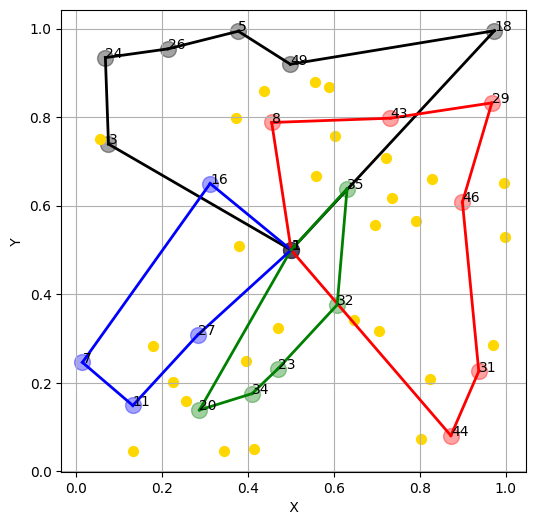

In [60]:
def main() -> None:
    # Creates the model.
    cars = range(4)
    cap = {0:100, 1:190, 2:130, 3:70}

    Dmin = 12
    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}
    in_route = {i: model.NewBoolVar(f"in_route_{i}") for i in nodes}

    for i in nodes:
      expressions = [assign[i,c] for c in cars] + [v for n,v in in_route.items() if n!=i and distance(i,n,data)<= Dmin]
      model.AddAtLeastOne(expressions)
      model.Add(in_route[i] <= sum(assign[i,c] for c in cars) )

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])
      model.Add(v<=in_route[i])



    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)
      model.Add( sum(assign[i,c] for i in nodes) <= 7)


      #expressions = [v*data[i][2] for (i,cc),v in assign.items() if c ==cc]
      #model.Add(sum(expressions) <= cap[c])

    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 360
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]
        #plt.scatter(X,Y,s=100)

        for (i,c),v in assign.items():
          if solver.value(v)>0:
            print(i,c, solver.value(in_route[i]) )

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        for n,v in in_route.items():
          if not solver.value(v):
            x1,y1 = data[n][0],data[n][1]
            plt.scatter(x1,y1,c='gold', s= 50)


        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

# Limited Daily Distance

Min of objective function: 569.0

1 0 1
1 1 1
1 2 1
1 3 1
2 1 1
3 3 1
5 3 1
7 0 1
9 1 1
11 0 1
12 0 1
14 2 1
16 3 1
18 1 1
20 0 1
24 3 1
26 3 1
29 1 1
31 2 1
32 2 1
33 0 1
34 0 1
38 3 1
41 2 1
43 1 1
44 2 1
46 2 1


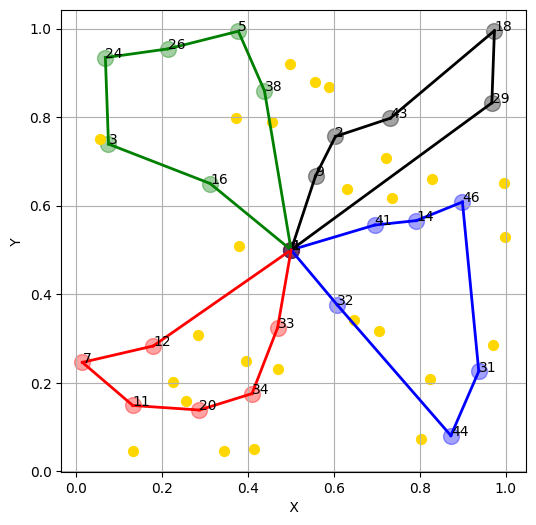

In [61]:
def main() -> None:
    # Creates the model.
    cars = range(4)
    cap = {0:100, 1:190, 2:130, 3:70}
    Dmin = 12
    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}
    in_route = {i: model.NewBoolVar(f"in_route_{i}") for i in nodes}

    for i in nodes:
      expressions = [assign[i,c] for c in cars] + [v for n,v in in_route.items() if n!=i and distance(i,n,data)<= Dmin]
      model.AddAtLeastOne(expressions)
      model.Add(in_route[i] <= sum(assign[i,c] for c in cars) )

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])
      model.Add(v<=in_route[i])

    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)
      model.Add( sum(assign[i,c] for i in nodes) <= 7)

      arcs_distance= [ distance(i,j,data)*v for (i,j,cc),v in x.items() if cc == c]
      model.Add( sum(arcs_distance) <= 230)


    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 360
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]
        #plt.scatter(X,Y,s=100)

        for (i,c),v in assign.items():
          if solver.value(v)>0:
            print(i,c, solver.value(in_route[i]) )

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        for n,v in in_route.items():
          if not solver.value(v):
            x1,y1 = data[n][0],data[n][1]
            plt.scatter(x1,y1,c='gold', s= 50)

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

In [53]:
data = {1: (0.5, 0.5, 0),
 2: (0.6032938169082293, 0.7562108184145938, 20),
 3: (0.07472475201926587, 0.7390918600532372, 18),
 4: (0.22499063130328856, 0.20230576957968283, 13),
 5: (0.3771457600244701, 0.993883586940067, 16),
 6: (0.996944577187803, 0.6516022694530335, 7),
 7: (0.013989304846158013, 0.24618666302814662, 3),
 8: (0.4548557134824929, 0.7878016821009027, 13),
 9: (0.5568871799369395, 0.6669799494093894, 14),
 10: (0.37068093166049076, 0.7990225388206484, 1),
 11: (0.13140393664262962, 0.1487946611744766, 3),
 12: (0.17885860292736544, 0.2831786658489319, 10),
 13: (0.645737926048391, 0.3408452578158331, 19),
 14: (0.7919716098508769, 0.5663126369728344, 12),
 15: (0.25524445622471126, 0.1583777731314686, 14),
 16: (0.3114838478536932, 0.6499966765965005, 13),
 17: (0.7206591160396403, 0.7068882032670168, 9),
 18: (0.9735099670408185, 0.99498727064737, 7),
 19: (0.3446038119418944, 0.046683484069192205, 6),
 20: (0.2866425752959685, 0.1386034957501685, 3),
 21: (0.7359808817862824, 0.6175331659881196, 18),
 22: (0.056060698512151896, 0.7515471525583471, 18),
 23: (0.4691656620420057, 0.23156333131292528, 19),
 24: (0.06745145873207303, 0.934247095558798, 4),
 25: (0.37858740812291514, 0.5077961737787795, 19),
 26: (0.21334957418751244, 0.9540270789381442, 3),
 27: (0.28283468399896206, 0.3083517437471849, 16),
 28: (0.5886291812238953, 0.8679496341114058, 10),
 29: (0.9674826365155533, 0.8320343392712091, 5),
 30: (0.8026408428054114, 0.0728358973124098, 20),
 31: (0.9370405149153596, 0.2261035500568983, 4),
 32: (0.6072715319442913, 0.37614658647552157, 10),
 33: (0.46853796283667126, 0.32438433888065366, 5),
 34: (0.4090201468977761, 0.17564145770516748, 16),
 35: (0.6304063670472589, 0.638292935577014, 10),
 36: (0.39405313421741417, 0.24933500378837625, 19),
 37: (0.5560469493243064, 0.8801750770325597, 20),
 38: (0.4379318248166867, 0.8595094904563212, 14),
 39: (0.8280305260276702, 0.659301731750247, 1),
 40: (0.13204901760775145, 0.04696013025075063, 5),
 41: (0.6946766364236925, 0.5562151544097507, 5),
 42: (0.824581355993853, 0.20818113444075237, 19),
 43: (0.7311949644222034, 0.797467367911236, 19),
 44: (0.8720761313303419, 0.08084865167025124, 15),
 45: (0.9701218237397088, 0.28646200937012034, 4),
 46: (0.8989802529783747, 0.6082737978741279, 1),
 47: (0.7056248998454107, 0.3165413180925287, 2),
 48: (0.4128232903252721, 0.05124605363660595, 13),
 49: (0.4982710323038596, 0.9193310635665481, 16),
 50: (0.9984552552245346, 0.5302810649297262, 8)}

new= {}
for n,(x,y,T) in data.items():
  new[n]= (round(x,3),round(y,3),T)
new

{1: (0.5, 0.5, 0),
 2: (0.603, 0.756, 20),
 3: (0.075, 0.739, 18),
 4: (0.225, 0.202, 13),
 5: (0.377, 0.994, 16),
 6: (0.997, 0.652, 7),
 7: (0.014, 0.246, 3),
 8: (0.455, 0.788, 13),
 9: (0.557, 0.667, 14),
 10: (0.371, 0.799, 1),
 11: (0.131, 0.149, 3),
 12: (0.179, 0.283, 10),
 13: (0.646, 0.341, 19),
 14: (0.792, 0.566, 12),
 15: (0.255, 0.158, 14),
 16: (0.311, 0.65, 13),
 17: (0.721, 0.707, 9),
 18: (0.974, 0.995, 7),
 19: (0.345, 0.047, 6),
 20: (0.287, 0.139, 3),
 21: (0.736, 0.618, 18),
 22: (0.056, 0.752, 18),
 23: (0.469, 0.232, 19),
 24: (0.067, 0.934, 4),
 25: (0.379, 0.508, 19),
 26: (0.213, 0.954, 3),
 27: (0.283, 0.308, 16),
 28: (0.589, 0.868, 10),
 29: (0.967, 0.832, 5),
 30: (0.803, 0.073, 20),
 31: (0.937, 0.226, 4),
 32: (0.607, 0.376, 10),
 33: (0.469, 0.324, 5),
 34: (0.409, 0.176, 16),
 35: (0.63, 0.638, 10),
 36: (0.394, 0.249, 19),
 37: (0.556, 0.88, 20),
 38: (0.438, 0.86, 14),
 39: (0.828, 0.659, 1),
 40: (0.132, 0.047, 5),
 41: (0.695, 0.556, 5),
 42: (0.8